In [1]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15305, done.
remote: Total 15305 (delta 0), reused 0 (delta 0), pack-reused 15305
Receiving objects: 100% (15305/15305), 14.13 MiB | 12.89 MiB/s, done.
Resolving deltas: 100% (10501/10501), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.3.0 requires setuptools<=64.0.2, but you have setuptools 67.6.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.3 MB/s eta 0:00:00
     

Create our own dataset using Roboflow
https://app.roboflow.com/cpen291g8/electronic-components-recognition/overview


We can add more data from public dataset later
https://universe.roboflow.com/?ref=ultralytics

In [2]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hlzonP37dxksdXcAFRm6")
project = rf.workspace("cpen291g8").project("own-dataset-o03rf")
dataset = project.version(1).download("yolov5")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/Own-dataset-1 in yolov5pytorch:: 100%|██████████| 74/74 [00:00<00:00, 2588.54it/s]


In [15]:
!python train.py --img 640 --batch 16 --epochs 500 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/datasets/Own-dataset-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h

In [5]:
# # Start tensorboard
# # Launch after you have started training
# # logs save in the folder "runs"
# %load_ext tensorboard
# %tensorboard --logdir runs

In [16]:
!python detect.py --weights /content/yolov5/runs/train/exp4/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], source=/content/datasets/Own-dataset-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/4 /content/datasets/Own-dataset-1/test/images/WIN_20230320_16_11_55_Pro_jpg.rf.4694c5fda4e0c4c4ab1c68a99ed2c0c3.jpg: 640x640 5 LED_reds, 12.6ms
image 2/4 /content/datasets/Own-dataset-1/test/images/WIN_20230320_16_16_17_Pro_jpg.rf.57f8a66159bdc680360b63290c78cb08.jpg: 640x640 3 capacitor_Ls, 12.7m

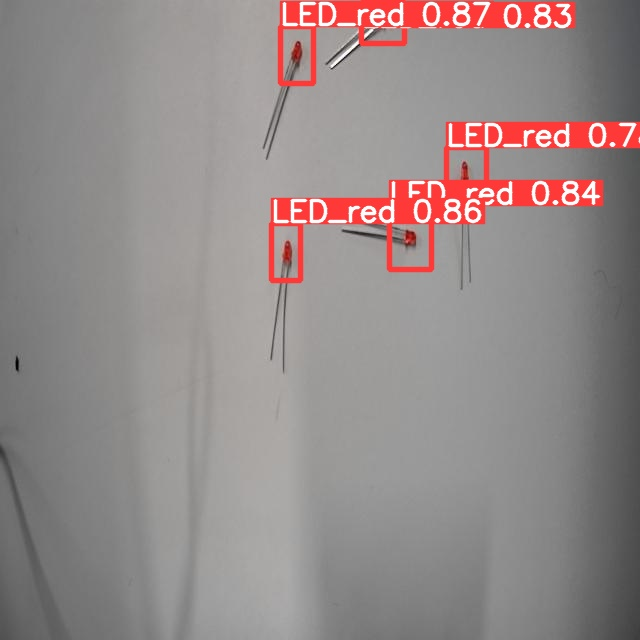

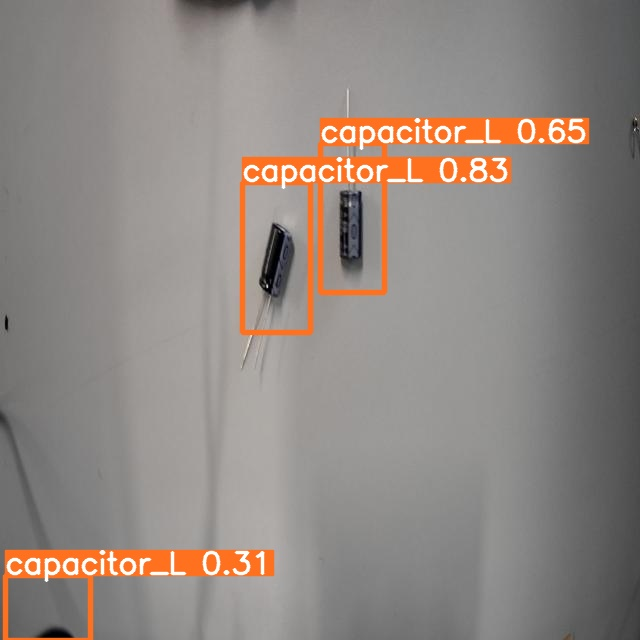

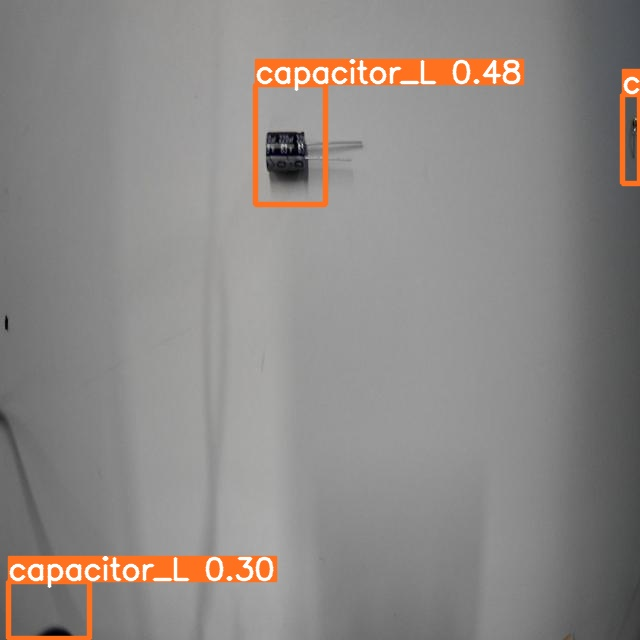

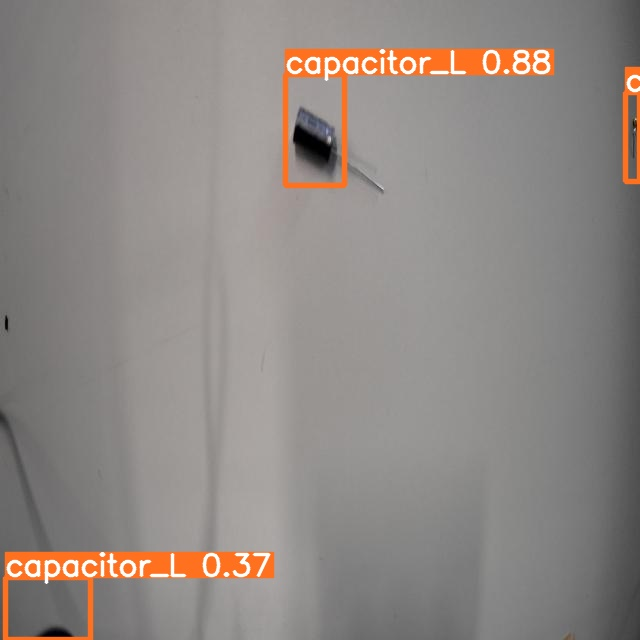

In [17]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp4/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [18]:
# !zip -r /content/file.zip /content/yolov5
# from google.colab import files
# files.download("/content/file.zip")